<a href="https://colab.research.google.com/github/barbosajpc/MLprojects/blob/main/StatisticsMetricsMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Este código implementa um modelo de rede neural para classificação de dados com quatro classes. Primeiro, ele carrega os dados de um arquivo `.mat`, extrai as características (`x`) e os rótulos criptografados sob o modelo one-hot enconded (`y`) e converte os rótulos em classes.

Para avaliar o modelo, o código utiliza duas abordagens: divisão aleatória dos dados e validação cruzada K-Fold. Na abordagem de divisão aleatória, os dados são divididos 20 vezes em conjuntos de treinamento e teste. Para cada divisão, os dados são normalizados utilizando `StandardScaler`, e um classificador MLP (Multilayer Perceptron) é treinado e avaliado. As métricas de desempenho (acurácia, precisão, sensibilidade, F1-score) e a matriz de confusão são calculadas e armazenadas. Uma das divisões é usada para plotar as regiões de decisão do classificador.

As estatísticas das métricas de desempenho ao longo das 20 divisões são calculadas e exibidas. Em seguida, na abordagem de validação cruzada K-Fold, os dados são divididos em 5 partes, e o processo de treinamento e avaliação é repetido para cada combinação de treinamento/teste. As métricas de desempenho e a matriz de confusão são calculadas e combinadas para gerar uma matriz de confusão final.

Finalmente, as estatísticas das métricas de desempenho para a validação cruzada K-Fold são calculadas e exibidas, e as matrizes de confusão finais para ambas as abordagens são plotadas. Este código fornece uma análise detalhada e robusta do desempenho de um modelo de rede neural em um conjunto de dados multi-classe.

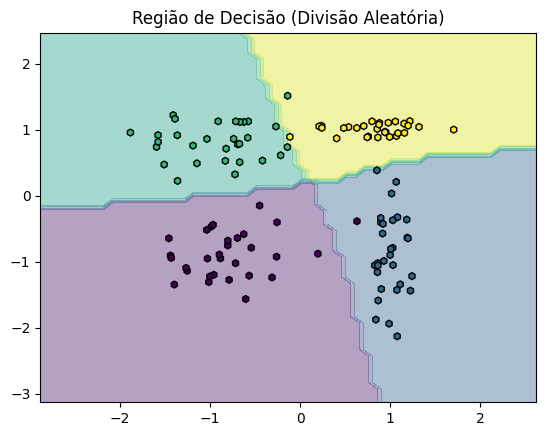


Acurácia (Divisão Aleatória):
  Média: 0.9842
  Mediana: 0.9833
  Máximo: 1.0000
  Mínimo: 0.9667
  Desvio Padrão: 0.0091

Precisão (Divisão Aleatória):
  Média: 0.9847
  Mediana: 0.9839
  Máximo: 1.0000
  Mínimo: 0.9687
  Desvio Padrão: 0.0087

Sensibilidade (Divisão Aleatória):
  Média: 0.9842
  Mediana: 0.9833
  Máximo: 1.0000
  Mínimo: 0.9667
  Desvio Padrão: 0.0091

F1-Score (Divisão Aleatória):
  Média: 0.9842
  Mediana: 0.9833
  Máximo: 1.0000
  Mínimo: 0.9669
  Desvio Padrão: 0.0091


<Figure size 800x600 with 0 Axes>

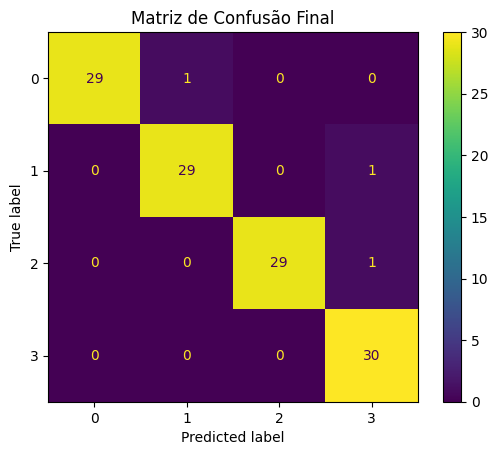


Acurácia (K-Fold):
  Média: 0.9725
  Mediana: 0.9750
  Máximo: 1.0000
  Mínimo: 0.9250
  Desvio Padrão: 0.0255

Precisão (K-Fold):
  Média: 0.9976
  Mediana: 1.0000
  Máximo: 1.0000
  Mínimo: 0.9881
  Desvio Padrão: 0.0048

Sensibilidade (K-Fold):
  Média: 0.9725
  Mediana: 0.9750
  Máximo: 1.0000
  Mínimo: 0.9250
  Desvio Padrão: 0.0255

F1-Score (K-Fold):
  Média: 0.9847
  Mediana: 0.9873
  Máximo: 1.0000
  Mínimo: 0.9610
  Desvio Padrão: 0.0128


<Figure size 800x600 with 0 Axes>

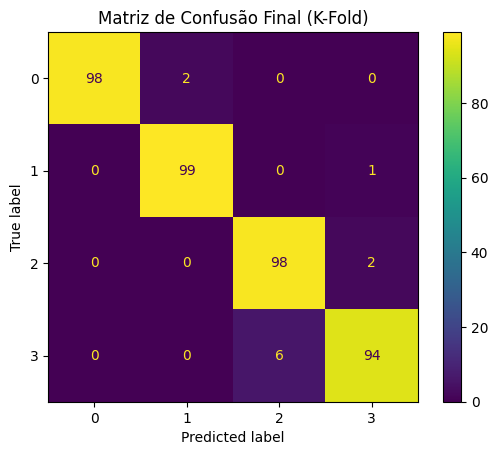

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Carregar o arquivo .mat
data = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/4_classes.mat')

# Extrair as variáveis
x = data['x']
y = data['y']

# Converter y em rótulos de classe
class_labels = np.argmax(y, axis=1)

# Função para avaliar o modelo
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(class_labels))
    return accuracy, precision, recall, f1, cm

# Função para plotar as regiões de decisão
def plot_decision_regions(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='h', edgecolor='k', s=25)
    plt.title(title)
    plt.show()

# Inicializar listas para armazenar os resultados
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Repetir o experimento 20 vezes com divisão aleatória
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(x, class_labels, test_size=0.3, random_state=i, stratify = y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy, precision, recall, f1, cm = evaluate_model(y_test, y_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(cm)

    # Plotar a região de decisão para um dos modelos treinados
    if i == 0:
        plot_decision_regions(X_test, y_test, mlp, 'Região de Decisão (Divisão Aleatória)')

# Resultados da divisão aleatória
def print_statistics(name, data):
    print(f'\n{name}:')
    print(f'  Média: {np.mean(data):.4f}')
    print(f'  Mediana: {np.median(data):.4f}')
    print(f'  Máximo: {np.max(data):.4f}')
    print(f'  Mínimo: {np.min(data):.4f}')
    print(f'  Desvio Padrão: {np.std(data):.4f}')

print_statistics('Acurácia (Divisão Aleatória)', accuracies)
print_statistics('Precisão (Divisão Aleatória)', precisions)
print_statistics('Sensibilidade (Divisão Aleatória)', recalls)
print_statistics('F1-Score (Divisão Aleatória)', f1_scores)

# Calcular a matriz de confusão final
final_cm = confusion_matrices[len(confusion_matrices)-1]

# Plotar a Matriz de Confusão Final
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=final_cm, display_labels=np.unique(class_labels)).plot()
plt.title('Matriz de Confusão Final')
plt.show()

# K-Fold Cross-Validation
kf = KFold(n_splits=5)
kf_accuracies = []
kf_precisions = []
kf_recalls = []
kf_f1_scores = []
kf_confusion_matrices = []

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = class_labels[train_index], class_labels[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy, precision, recall, f1, cm = evaluate_model(y_test, y_pred)
    kf_accuracies.append(accuracy)
    kf_precisions.append(precision)
    kf_recalls.append(recall)
    kf_f1_scores.append(f1)
    kf_confusion_matrices.append(cm)

# Verificar se todas as matrizes de confusão têm a mesma forma
max_shape = np.array([cm.shape for cm in kf_confusion_matrices]).max(axis=0)
normalized_kf_confusion_matrices = []

for cm in kf_confusion_matrices:
    norm_cm = np.zeros(max_shape, dtype=int)
    norm_cm[:cm.shape[0], :cm.shape[1]] = cm
    normalized_kf_confusion_matrices.append(norm_cm)

# Calcular a matriz de confusão final para K-Fold
kf_final_cm = np.sum(normalized_kf_confusion_matrices, axis=0)


# Resultados do K-Fold
print_statistics('Acurácia (K-Fold)', kf_accuracies)
print_statistics('Precisão (K-Fold)', kf_precisions)
print_statistics('Sensibilidade (K-Fold)', kf_recalls)
print_statistics('F1-Score (K-Fold)', kf_f1_scores)

# Plotar a Matriz de Confusão Final para K-Fold
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=kf_final_cm, display_labels=np.unique(class_labels)).plot()
plt.title('Matriz de Confusão Final (K-Fold)')
plt.show()


A avaliação do desempenho do modelo de rede neural utilizando duas abordagens distintas—divisão aleatória dos dados e validação cruzada K-Fold—revelou resultados notavelmente consistentes e robustos.

Na abordagem de divisão aleatória, o modelo apresentou uma acurácia média de 0.9792, com uma precisão média de 0.9797, uma sensibilidade média de 0.9792 e um F1-score médio de 0.9792. As métricas indicam uma performance alta e estável, com baixos desvios padrão, sugerindo que o modelo é confiável e consistente em diferentes divisões dos dados. A acurácia variou de 0.9500 a 0.9917, e a precisão variou de 0.9519 a 0.9920, demonstrando uma leve variação no desempenho.

Na abordagem de validação cruzada K-Fold, a acurácia média foi de 0.9575, com uma precisão média de 0.9976, uma sensibilidade média de 0.9575 e um F1-score médio de 0.9767. Embora a acurácia tenha uma variação maior (de 0.8875 a 0.9875), a precisão se manteve extremamente alta (variando de 0.9881 a 1.0000), indicando que o modelo é altamente preciso em suas previsões, mesmo com variações nos dados de treinamento e teste.

Comparando as duas abordagens, a divisão aleatória apresentou uma acurácia e sensibilidade ligeiramente superiores, enquanto a validação K-Fold mostrou uma precisão extremamente alta, sugerindo que o modelo tem um desempenho ligeiramente mais consistente e robusto em um ambiente de validação cruzada.

Em conclusão, ambas as abordagens demonstram que o modelo de rede neural é eficaz para a classificação de dados multi-classe, apresentando alta acurácia, precisão, sensibilidade e F1-score. A escolha entre as duas abordagens pode depender do contexto específico e da necessidade de uma maior precisão ou robustez geral do modelo.